x*(x - 2)/2
sine 2*i+1 integral:
(0, 6.54487575246776e-12)
(1, 1.963507134661313e-11)
(2, 3.27249061182755e-11)
(3, 4.5815004567906215e-11)
(4, 5.890472831726612e-11)
(5, 7.19949447280932e-11)
(6, 8.50848350109068e-11)
(7, 9.817498897168875e-11)
(8, 1.1126468496547304e-10)
(9, 1.243548805596184e-10)
(10, 1.3744471533128078e-10)
(11, 1.5053485194482796e-10)
sine i+1 integral, sympy answer:
(0, 6.54487575246776e-12)
(1, 0.31830988620997064)
(2, 1.963507134661313e-11)
(3, 0.15915494309189532)
(4, 3.27249061182755e-11)
(5, 0.10610329547313685)
(6, 4.5815004567906215e-11)
(7, 0.07957747154594767)
(8, 5.890472831726612e-11)
(9, 0.06366197736765776)
(10, 7.19949447280932e-11)
(11, 0.05305164769729848)
sine i+1 integral:
(0, 6.54487575246776e-12)
(1, 2.617994709908089e-11)
(2, 1.963507134661313e-11)
(3, 4.007461029686965e-17)
(4, 3.27249061182755e-11)
(5, 7.853995231954514e-11)
(6, 4.5815004567906215e-11)
(7, 1.9895196601282807e-18)
(8, 5.890472831726612e-11)
(9, 1.30899624473102e-10)
(10, 7.1

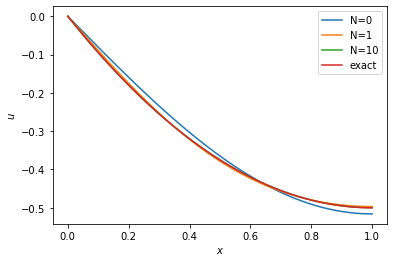

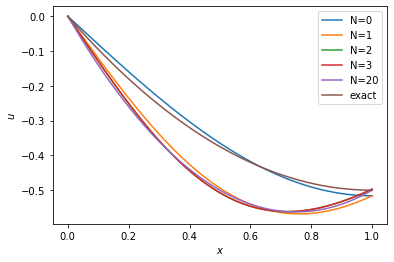

In [1]:
import matplotlib.pyplot as plt

def model():
    """Solve u'' = -1, u(0)=0, u'(1)=0."""
    import sympy as sym
    x, c_0, c_1, = sym.symbols('x c_0 c_1')
    u_x = sym.integrate(1, (x, 0, x)) + c_0
    u = sym.integrate(u_x, (x, 0, x)) + c_1
    r = sym.solve([u.subs(x,0) - 0,
                   sym.diff(u,x).subs(x, 1) - 0],
                  [c_0, c_1])
    u = u.subs(c_0, r[c_0]).subs(c_1, r[c_1])
    u = sym.simplify(sym.expand(u))
    return u

def midpoint_rule(f, M=100000):
    """Integrate f(x) over [0,1] using M intervals."""
    from numpy import sum, linspace
    dx = 1.0/M                       # interval length
    x = linspace(dx/2, 1-dx/2, M)    # integration points
    return dx*sum(f(x))

def check_integral_b():
    from numpy import pi, sin
    for i in range(12):
        exact = 2/(pi*(2*i+1))
        numerical = midpoint_rule(
            f=lambda x: sin((2*i+1)*pi*x/2))
        print((i, abs(exact - numerical)))

def sine_sum(x, N):
    s = 0
    from numpy import pi, sin, zeros
    u = [] # u[k] is the sum i=0,...,k
    k = 0
    for i in range(N+1):
        s += - 16.0/((2*i+1)**3*pi**3)*sin((2*i+1)*pi*x/2)
        u.append(s.copy())  # important with copy!
    return u

def plot_sine_sum():
    from numpy import linspace
    x = linspace(0, 1, 501)  # coordinates for plot
    u = sine_sum(x, N=10)
    u_e = 0.5*x*(x-2)
    N_values = 0, 1, 10
    for k in N_values:
        plt.plot(x, u[k])
    plt.plot(x, u_e)
    plt.legend(['N=%d' % k for k in N_values] + ['exact'],
               loc='upper right')
    plt.xlabel('$x$');  plt.ylabel('$u$')
    plt.savefig('tmpc.png'); plt.savefig('tmpc.pdf')

def check_integral_d():
    from numpy import pi, sin
    for i in range(24):
        if i % 2 == 0:
            exact = 2/(pi*(i+1))
        elif (i-1) % 4 == 0:
            exact = 2*2/(pi*(i+1))
        else:
            exact = 0
        numerical = midpoint_rule(
            f=lambda x: sin((i+1)*pi*x/2))
        print((i, abs(exact - numerical)))

def check_integral_d_sympy_answer():
    from numpy import pi, sin
    for i in range(12):
        exact = 2/(pi*(i+1))
        numerical = midpoint_rule(
            f=lambda x: sin((i+1)*pi*x/2))
        print((i, abs(exact - numerical)))

def sine_sum_d(x, N):
    s = 0
    from numpy import pi, sin, zeros
    u = []  # u[k] is the sum i=0,...,k
    k = 0
    for i in range(N+1):
        if i % 2 == 0:       # even i
            s +=   - 16.0/((i+1)**3*pi**3)*sin((i+1)*pi*x/2)
        elif (i-1) % 4 == 0:   # 1, 5, 9, 13, 17
            s += - 2*16.0/((i+1)**3*pi**3)*sin((i+1)*pi*x/2)
        else:
            s += 0
        u.append(s.copy())
    return u

def plot_sine_sum_d():
    from numpy import linspace
    x = linspace(0, 1, 501)  # coordinates for plot
    u = sine_sum_d(x, N=20)
    u_e = 0.5*x*(x-2)
    N_values = 0, 1, 2, 3, 20
    for k in N_values:
        plt.plot(x, u[k])
    plt.plot(x, u_e)
    plt.legend(['N=%d' % k for k in N_values] + ['exact'],
               loc='upper right')
    plt.xlabel('$x$');  plt.ylabel('$u$')
    #plt.axis([0.9, 1, -0.52, -0.49])
    plt.savefig('tmpd.png'); plt.savefig('tmpd.pdf')


if __name__ == '__main__':
    import sys
    print((model()))
    print('sine 2*i+1 integral:')
    check_integral_b()
    print('sine i+1 integral, sympy answer:')
    check_integral_d_sympy_answer()
    print('sine i+1 integral:')
    check_integral_d()
    #sys.exit(0)
    plot_sine_sum()
    plt.figure()
    plot_sine_sum_d()
    plt.show()